# 🚜 Predicting the sale price of Bulldozers using Machine Learning

## 1. Problem definition

>The goal of this project is to predict the sale price of bulldozers based on their
characteristics and historical auction data. The model is trained using past data
to predict future prices, following a time-based validation approach

## 2. Data
The data is downloaded from the kaggle BlueBook kaggle competition
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set. It contains data from May 1, 2012 - November 2012.

## 3. Evaluation
The evaluation metric for this is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset.
Link to the google sheet: https://1drv.ms/x/c/5e886f912b7b216e/IQCD8guPLYMwT40osM3n3Rx0AX4SslWriFU92T8tfkGtFXU?e=g9XrfJ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#import training data
df=pd.read_csv("data/TrainAndValid.csv",
              low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

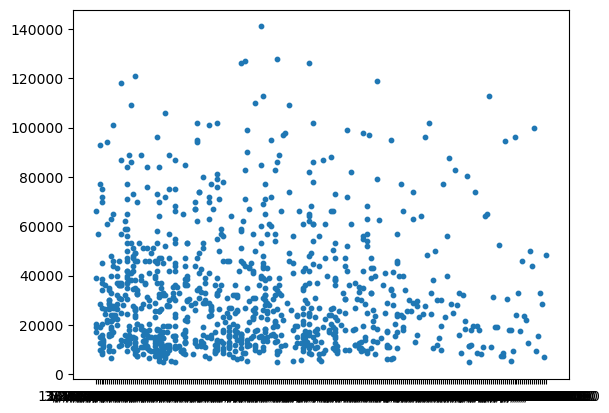

In [6]:
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000],s=10);

<Axes: ylabel='Frequency'>

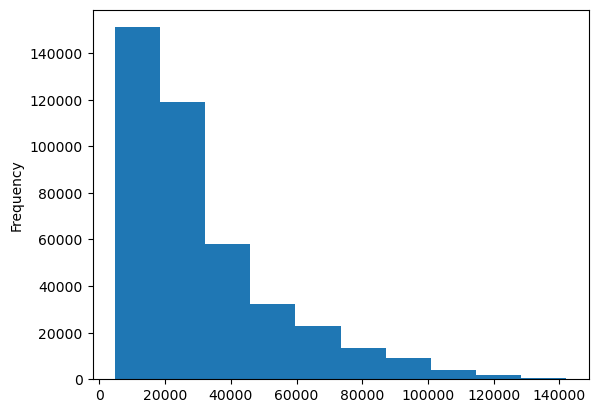

In [7]:
df.SalePrice.plot.hist()

### Parsing dates

--> converting date strings to datetime object

When we work with time series data, we want to enrich the time and date component as much as possible 

We can do that by telling pandas which of our columns has date in it using `parse_dates` parameter

In [13]:
#Import data again but this time parse dates
df=pd.read_csv("data/TrainAndValid.csv",
               low_memory=False,
               parse_dates=["saledate"])

In [14]:
print(df.saledate.dtype)
df.saledate[:10]

datetime64[ns]


0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

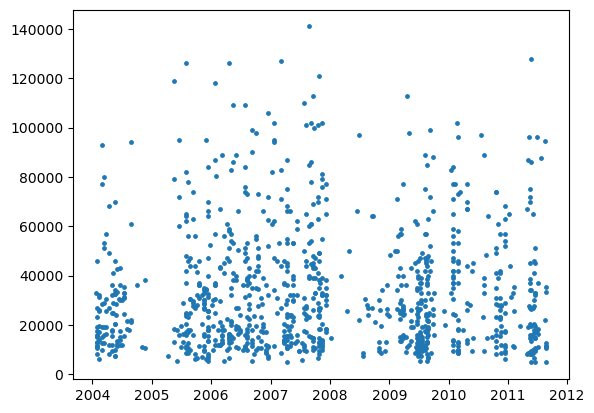

In [15]:
# Will try same plot now
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000],s=6)

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort dataFrame by sale date

When working with time series data, it's goo idea to sort it by date

In [18]:
#Sort data frame in date order
df=df.sort_values(by=["saledate"],ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Making a copy of the original dataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

In [194]:
df_tmp=df.copy()
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

* ML models cannot understand full dates well
* They understand numbers better

In [195]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear #day no of year (1-365)

In [196]:
# Now we've enriched our dataframe with date time features,
# we can remove sale date column
df_tmp=df_tmp.drop("saledate",axis=1)
df_tmp.tail().T

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,D38E,2064,337G,12G,544H


In [197]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We've done enough EDA now start to do some model-driven EDA

Model-driven EDA means:
> Using a machine learning model to explore and understand the data,
instead of relying only on plots and summary statistics.

In [198]:
# # Lets build machine learning model
# from sklearn.ensemble import RandomForestRegressor

# model=RandomForestRegressor(n_jobs=-1,
#                       random_state=42)
# model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

### Converting string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.


📌 When to use this?
* To reduce memory usage
* To mark column as categorical
* When using tree-based models (sometimes)

❌ When NOT enough?
Linear, Logistic Regression, KNN, NN

👉 These models still need numbers, not category labels.

We can check different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html#data-types-related-functionality

In [199]:
df_tmp.select_dtypes(include="object").columns

# for label,content in df_tmp.items():  --> not working 
#     if pd.api.types.is_string_dtype(content):
#         print(label)

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [200]:
#This will turn all of the string value into category values
for label,content in df_tmp.items():
    if content.dtype=="object":
        df_tmp[label]=content.astype("category").cat.as_ordered()

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [201]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [202]:
df_tmp.state.cat.codes
#It converts each category value in the state column into its numeric code.

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [203]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Fill missing values

Filling numeric missing values first

In [204]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [205]:
def check_numerical_na(df):
    # Check for which numeric columns have null values
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label)

In [206]:
# Fill numeric rows with the median
def fill_numerical_na(df):
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add binary column which tells if data was missing
                df[label+"_is_missing"]=pd.isnull(content)
                # Fill missing numeric value with median
                df[label]=content.fillna(content.median())

### Filling and turning categorical variables into numbers

In [207]:
def check_categorical_na(df):
    # Check for columns which aren't numeric
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            print(label)

In [208]:
def fill_categorical_na(df):
    # Turns categorical variables into numbers and fill missing values
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            #Turn categories into no. add +1 
            # Adding -1 as .codes gives -1 to null values
            df[label]=pd.Categorical(content).codes+1

### Buliding machine learning model

In [174]:
%%time
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

In [48]:
#Score the model
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875468079970562

### Splitting data into train/validation set

In [209]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [210]:
# Split dataset
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [211]:
#Split data into x and y
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_val,y_val=df_val.drop("SalePrice",axis=1),df_val.SalePrice

x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 56), (401125,), (11573, 56), (11573,))

In [212]:
#Fill the missing values now -> after splitting data
x_val.loc[405675,"auctioneerID"]=np.nan
check_numerical_na(x_val)

auctioneerID
MachineHoursCurrentMeter


In [213]:
fill_numerical_na(x_train)
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,NaN,TD20,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,NaN,A66,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,1473654,4139,132,99.0,1978,0.0,NaN,D7G,D7,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,NaN,A62,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,1336053,4089,132,99.0,1984,0.0,NaN,D3B,D3,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [214]:
fill_categorical_na(x_train)
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [215]:
fill_numerical_na(x_val)
x_val.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
405675,4449186,2318824,26964,173,1.0,1996,0.0,NaN,D65E12,D65,...,None or Unspecified,NaN,NaN,2012,1,1,6,1,True,False
401133,1222855,531393,23926,121,3.0,1000,8145.0,Low,12HNA,12,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
406076,6258613,1810917,13260,149,99.0,2000,24.0,Low,590SUPER LII,590,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
409018,6282680,1543404,1830,149,99.0,2004,4373.0,Medium,120C,120,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
409026,6282759,1863077,11390,149,99.0,2006,3467.0,Medium,160CLC,160,...,NaN,NaN,NaN,2012,1,4,2,4,False,False


In [216]:
fill_categorical_na(x_val)
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


### Building an evaluation function

In [217]:
# Create evluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_pred):
    """
    calculates root mean squared error b/w predictions
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

# Create fn to evaluate model on few different levels
def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_val,val_preds),
           "Training RMSLE":rmsle(y_train,train_preds),
           "Valid RMSLE":rmsle(y_val,val_preds),
           "Training R2 score":r2_score(y_train,train_preds),
           "Valid R2 score":r2_score(y_val,val_preds)
           }
    return scores

### Testing our model on a subset (to tune hyperparameters)

In [191]:
%%time
model=RandomForestRegressor(n_jobs=-1,max_samples=10000,
                           random_state=42)

CPU times: total: 0 ns
Wall time: 53.2 μs


In [192]:
%%time
model.fit(x_train,y_train)

CPU times: total: 2min 20s
Wall time: 19.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [218]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7192.4443687894245,
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29463344478371534),
 'Training R2 score': 0.8606658995199189,
 'Valid R2 score': 0.8318341185035097}

### Hyperparameters tuning with Randomized searchCV

In [222]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_grid={"n_estimators": np.arange(10,100,10),
      "max_depth": [None,3,5,10],
      "min_samples_split": np.arange(2,20,2),
      "min_samples_leaf": np.arange(1,10,2),
      "max_features": [0.5,1,"sqrt"],
      "max_samples": [10000]}

#Instantiate model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rs_grid,
                            n_iter=10,cv=5, verbose=True)

#Fit the model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 6min 9s
Wall time: 5min 11s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [223]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(5),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [224]:
#Evaluate the randomized search model
show_scores(rs_model)

{'Training MAE': 6964.566661947091,
 'Valid MAE': 8072.641045110851,
 'Training RMSLE': np.float64(0.30951161831452123),
 'Valid RMSLE': np.float64(0.3252476893756896),
 'Training R2 score': 0.7936975138737721,
 'Valid R2 score': 0.7931510681139426}

### Train a model with best hyperparameters

**Note** :These were found after 100 iterations of Randomized Search CV

In [227]:
%%time

#Most ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
#Fit the ideal model
ideal_model.fit(x_train,y_train)

CPU times: total: 9min 12s
Wall time: 2min 31s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [228]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5963.70067280992,
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.2455523902383914),
 'Training R2 score': 0.9588145522577225,
 'Valid R2 score': 0.8811126179653063}

### Make predictions on test data

In [265]:
test_df=pd.read_csv("data/Test.csv",low_memory=False,
                     parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [266]:
# Add datetime parameters from saledate like training data

test_df["saleYear"]=test_df.saledate.dt.year
test_df["saleMonth"]=test_df.saledate.dt.month
test_df["saleDay"]=test_df.saledate.dt.day
test_df["saleDayOfWeek"]=test_df.saledate.dt.dayofweek
test_df["saleDayOfYear"]=test_df.saledate.dt.dayofyear #day no of year (1-365)

test_df=test_df.drop("saledate",axis=1)

test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


In [267]:
# ValueError: The feature names should match those that were passed during fit.
# Feature names seen at fit time, yet now missing:
# - auctioneerID_is_missing

#We can find how the column differ using sets
set(x_train.columns)-set(test_df.columns)

#Manually adjust test_df to have 'auctioneerID_is_missing' column
test_df['auctioneerID_is_missing']=False

In [268]:
fill_numerical_na(test_df)
check_numerical_na(test_df)

In [269]:
fill_categorical_na(test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [270]:
# Filled all null missing null values
test_df.isnull().sum().sum()

np.int64(0)

In [273]:
#Make predictions
test_preds=ideal_model.predict(test_df)

In [274]:
len(test_preds)

12457

In [277]:
#Format prediction into saleID, salePrice

df_preds=pd.DataFrame()
df_preds["SaleID"]=test_df["SalesID"]
df_preds["SalePrice"]=test_preds
df_preds.head(10)

,SaleID,SalePrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
5,1227870,29873.231696
6,1227871,26638.711081
7,1227879,12727.237216
8,1227880,16154.715120
9,1227881,34470.409058


In [278]:
#Export prediction data
df_preds.to_csv("data/test_predictions.csv",index=False)